# Day 5  | First week task

Lets put our knowledge into action by tackling following tasks: 


- Load time lapse fluorescence data from Matlab file "task1.mat" that is in the main course folder. Data are stored in two matrices: *x_norm* contains trajectories and *t* is a time vector

- Plot (with labels) example cell tracetories | Tip: transpose the loaded data to get first dimension the same

- Find peaks in each trajectories usin scipy library functions | Tip: Search for suitable functions in scipy manual

- Calculate amplitude and period of oscillations | Tip: the period of oscillation is a distance between peaks in a single cell trajectory

- Draw histograms of period distribution

- Plot amplitude vs period with labels 

- Select ten cell trajectiories with the smallest periods and plot those as a heat map 

- Perform frequency analysis using FFT Fourier transformation and identify a dominant frequency in the signal


# Exam solution team 16 
## Guillermo Chumaceiro

## Task 1

In [355]:
#import necessary tools, please add yourself here whatever you think you might need to solve the task

#basics
import numpy as np
import scipy.io as sio # To load the data
import matplotlib.pyplot as plotter
from scipy.fftpack import fft
from scipy.signal import find_peaks # Peaks of functions

# Import data
data = sio.loadmat('./task1.mat')

x = np.transpose(data['x_norm']) # Fluorescence of label
time = np.transpose(data['t'])
x.shape



(101, 501)

## Task 2

In [214]:
# Improve this
plotter.style.use('classic') # Set style to classic


def trajectory_plots(x, y, num_cells, random = False):
    '''
    This function takes as input the values of fluorescence (y) 
    in a time interval (x), it plots the number of cells specified
    in the variable num_cells. Also, you have the option to plot 
    random num_cells or just the first num_cells.
    The output is an oscillation plot of the specified num_cells.
    '''
    
    # If you want random cells from the list
    if random:
        # Pick random nombres from 0 to 500
        cell_list = np.random.choice(np.arange(0,501), num_cells)
    else:
        # The cells are the first on the array
        cell_list = range(num_cells)
    
    # Configure the plot axis and title
    plotter.title("Gene oscilation plot")
    plotter.xlabel("Time (min)")
    plotter.ylabel("Fluorescence (a.u.)")
    
    # Go through each cell in the cell list
    for cell in cell_list:
        # Plot the specified cell
        plotter.plot(x,y[:,cell], label= 'Cell {}'.format(cell +1))
    
    # Include a legend only if num_cells is less than 10, 
    # Else the legend would be too long
    if num_cells <= 10:
        plotter.legend()


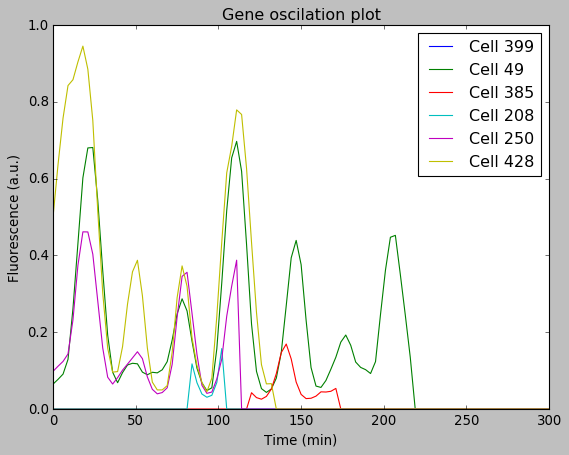

In [216]:
# An example of 6 random cell oscilations 
trajectory_plots(time, x, 6, True)

## Task 3

In [384]:
def find_trayectory_peaks(cell_trayectories):
    '''
    This function takes as input the fluorecence data of the cells
    and find all the peaks for each cell, then prints a statement with
    all the peaks from each cell
    '''
    # Go though each of the cells in the data
    for cell in range(cell_trayectories.shape[1]):
        # Find the index of the peaks
        peaks = find_peaks(cell_trayectories[:, cell])[0]
        
        # Mask the cell trayectory with the peak index
        fluor_peak_values = cell_trayectories[:,cell][peaks]
        
        # Do not consider empty list (no peaks)
        if len(fluor_peak_values) != 0:
            print("Peak fluorescence values for cell {} are:".format(cell+1), fluor_peak_values)
        else:
            print("Cell {} has no peaks".format(cell+1))

In [385]:
find_trayectory_peaks(x)

Peak fluorescence values for cell 1 are: [0.20912455 0.11654549 0.34739995 0.32897025 0.08406143]
Peak fluorescence values for cell 2 are: [0.46135598 0.14907495 0.35601946 0.43592348 0.05847783]
Peak fluorescence values for cell 3 are: [0.3009476  0.13302727 0.23605567 0.4368582  0.34535627 0.14280022]
Peak fluorescence values for cell 4 are: [0.35456353]
Cell 5 has no peaks
Peak fluorescence values for cell 6 are: [0.14192905 0.08626089 0.28164442 0.33217028 0.30972232 0.1197621 ]
Peak fluorescence values for cell 7 are: [0.16296327]
Peak fluorescence values for cell 8 are: [0.1758425  0.06540583 0.18957792 0.19453902 0.08227695 0.11098527]
Peak fluorescence values for cell 9 are: [0.23112172 0.42886717 0.29841243 0.53999387 0.48834663]
Peak fluorescence values for cell 10 are: [0.10979867 0.25762682 0.23453471 0.23998152]
Peak fluorescence values for cell 11 are: [0.11751272 0.30569894]
Peak fluorescence values for cell 12 are: [0.27386691]
Peak fluorescence values for cell 13 are: 

Peak fluorescence values for cell 282 are: [0.10630611 0.4828712  0.40875945 0.13931003 0.04608633]
Peak fluorescence values for cell 283 are: [0.10979867 0.25762682 0.26208959 0.24356476 0.29949193 0.56052832]
Peak fluorescence values for cell 284 are: [0.10979867 0.25762682 0.26007138 0.22933458]
Peak fluorescence values for cell 285 are: [0.10979867 0.25762682 0.23453471 0.23998152]
Peak fluorescence values for cell 286 are: [0.3614697  0.39949903 0.56917405 0.15692973]
Cell 287 has no peaks
Peak fluorescence values for cell 288 are: [0.02372628]
Peak fluorescence values for cell 289 are: [0.23112172 0.42886717 0.29841243 0.48018239]
Peak fluorescence values for cell 290 are: [0.3009476  0.13302727 0.17252727 0.31228375]
Peak fluorescence values for cell 291 are: [0.33872456 0.16160787 0.35375459 0.14328622]
Cell 292 has no peaks
Cell 293 has no peaks
Cell 294 has no peaks
Cell 295 has no peaks
Peak fluorescence values for cell 296 are: [0.1046808  0.19784163 0.13779242 0.1739628 ]


## Task 4

In [361]:
def amplitude_period_oscilation(cell_trayectories):
    '''
    This function takes as input the oscillation data and calculates
    The mean amplitude and mean period of every trayectory.
    The function returns a numpy array with the mean amplitudes in
    the first column, the mean periods in the second column
    and the trayectory cell number in the third column
    '''
    
    # Create an empty list where the mean amplitude and 
    # mean period will be stored
    amp_and_periods = []
    
    # Go through each cell in the data
    for cell in range(cell_trayectories.shape[1]):

        # Find the index of the peaks
        peaks = find_peaks(cell_trayectories[:, cell])[0]
        
        # Mask the cell trayectory with the peak index
        fluor_peak_values = cell_trayectories[:,cell][peaks]
        
        # Calculate the mean of the peak values, for the mean amplitude
        mean_amplitude = np.mean(fluor_peak_values)
        
        # The index is actually the time, to calculate the period, but not scaled
        scaled_time = peaks * 3
        
        # Calculate the difference between times (the period)
        period = np.diff(scaled_time) 
        
        # calculate the mean of the periods
        mean_period = np.mean(period)
        
        # Append the values to the data list, also include the cell number as last column
        # in order to identify to which trayectory the oscilation and amplitude belongs to
        amp_and_periods.append([mean_amplitude, mean_period, cell])
    
    # Convert the amplitude and period values to a numpy array
    amp_and_per = np.array(amp_and_periods, dtype= np.float)
    
    # drop NaN values if any row has at least one NaN
    amp_and_per = amp_and_per[~np.isnan(amp_and_per).any(axis=1)]
    
    # Return the mean amplitude and period without the nan values
    return amp_and_per

In [362]:
# Create the amplitude and period data
data = amplitude_period_oscilation(x)
data.shape

(391, 3)

In [273]:
# Go through each row of the data and print the amplitude an period
for cell in range(data.shape[0]):
    
    print("Cell {} has a mean amplitude of {} and a mean period of {} minutes".format(int(data[cell,2]), data[cell,0], data[cell,1]))

Cell 0 has a mean amplitude of 0.21722033416977998 and a mean period of 22.5 minutes
Cell 1 has a mean amplitude of 0.2921703407589957 and a mean period of 28.5 minutes
Cell 2 has a mean amplitude of 0.26584087219100255 and a mean period of 30.0 minutes
Cell 5 has a mean amplitude of 0.21191484377323375 and a mean period of 15.6 minutes
Cell 7 has a mean amplitude of 0.13643791612796194 and a mean period of 15.0 minutes
Cell 8 has a mean amplitude of 0.3973483648785421 and a mean period of 31.5 minutes
Cell 9 has a mean amplitude of 0.2104854305999021 and a mean period of 25.0 minutes
Cell 10 has a mean amplitude of 0.2116058282857221 and a mean period of 24.0 minutes
Cell 13 has a mean amplitude of 0.185417804517504 and a mean period of 27.0 minutes
Cell 14 has a mean amplitude of 0.274067105632403 and a mean period of 31.5 minutes
Cell 15 has a mean amplitude of 0.26253877613670157 and a mean period of 21.0 minutes
Cell 16 has a mean amplitude of 0.185417804517504 and a mean period o

In [222]:
print("There are {} cells after dropping Nan values".format(len(data))) 

There are 391 cells after dropping Nan values


## Task 5

Text(0, 0.5, 'Number of cells')

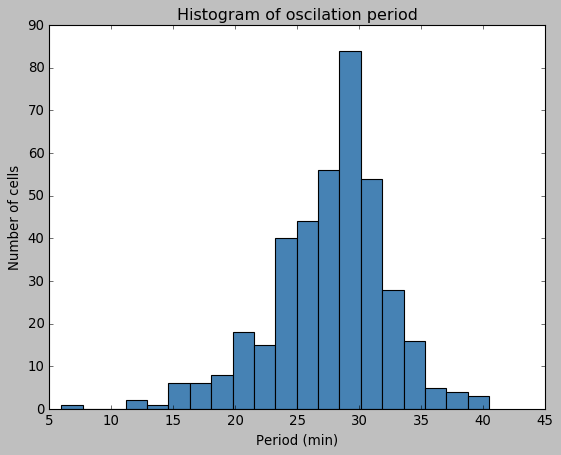

In [363]:
# plot the histogram with the mean period data, using a bin of 20
plotter.hist(data[:,1], bins = 20, color='steelblue')
# Configure the plot axis and title
plotter.title("Histogram of oscilation period")
plotter.xlabel("Period (min)")
plotter.ylabel("Number of cells")

## Task 6

Text(0, 0.5, 'Amplitude (a.u.)')

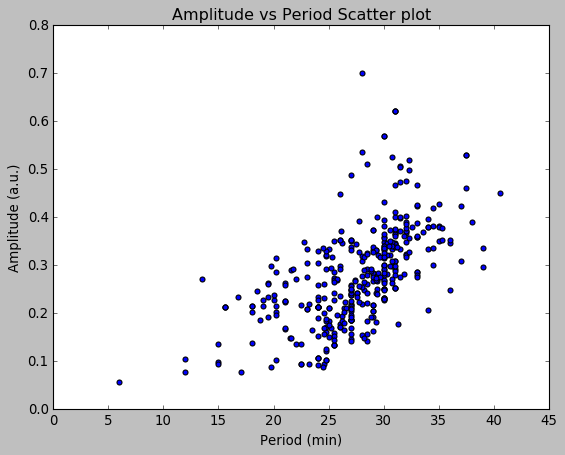

In [373]:
# Make the scatter plot of of amplitude vs period
plotter.scatter(data[:,1], data[:,0])
# Configure the plot axis and title
plotter.title("Amplitude vs Period Scatter plot")
plotter.xlabel("Period (min)")
plotter.ylabel("Amplitude (a.u.)")

The tendency shown by this plot at simple sight is that the amplitude increases as the period of the oscilations increases.

## Task 7

In [350]:
# Print numbers in non-scientific notation
np.set_printoptions(suppress= True)
# Sort the values of data and use the index of the 
# 10 lowest values of periods to mask the data and
# Retrieve those values
lowest_10 = data[data[:, 1].argsort()][0:10,:]

# Get the index of the lowest 10 values (third column)
lowest_10_index = lowest_10[:, 2].astype(np.int)

# Mask the original data to find the oscillation using the lowest indices
lowest_10_trayectories = x[:,lowest_10_index]

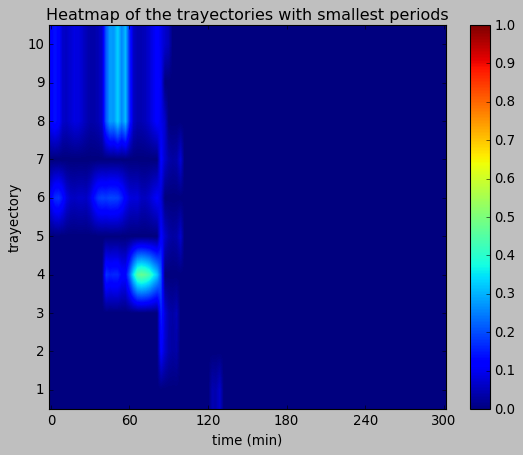

In [353]:
fig = plotter.figure()
plotter.style.use('classic')
plotter.imshow(lowest_10_trayectories.T, aspect='auto',origin='lower',
           cmap='jet')
plotter.title("Heatmap of the trayectories with smallest periods")
plotter.xlabel("time (min)")
plotter.ylabel("trayectory")
# Include the 10 values in the y axis
plotter.yticks(range(0,10),range(1,11))
# Adjust the X axis to scale the time 
plotter.xticks(range(0,101,20), range(0,301,60))
plotter.colorbar()
plotter.clim(0,1)

## Task 8

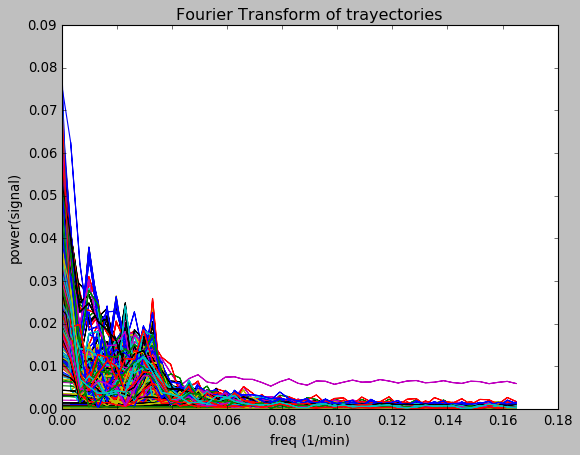

In [374]:
# Number of samples
N = 500

# Go through each trayectory
for cell in range(x.shape[1]):
    # Calculate the fourier transform of all the cells
    yf = fft(x[:, cell])
    # Convert the time space to frequency space for x axis
    xf = np.abs(np.fft.fftfreq(101,d=3))
    # Plot the fourier transform in the frequency space
    plotter.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    # Add labels to the plot
    plotter.title('Fourier Transform of trayectories')
    plotter.xlabel('freq (1/min)')
    plotter.ylabel('power(signal)')

The plot shows all the frequencies of each trayectory. We can see that most peaks are between 0 and 0.04, wich means that the dominat frequency in the signal lies between these values.
In terms of period, the most signal has periods between 0 and 25 minutes.